In [0]:
!pip install tensorboardX

     |████████████████████████████████| 204kB 1.3MB/s 


In [0]:
from torchvision import transforms
from torchvision.datasets import SVHN
from torchvision.models import resnet18
import torch.nn as nn
import numpy as  np
import torch 
import matplotlib.pyplot as py
from tqdm import tqdm
import cv2
from google.colab.patches import cv2_imshow
from torch.autograd import Variable
from torch.utils.data import DataLoader
from utils import Logger

In [0]:
trans=transforms.Compose([
                      transforms.ToTensor()
])

In [0]:
# Dataset
data=SVHN('./content',transform=trans,download=True)
data_loader=DataLoader(data,batch_size=8)

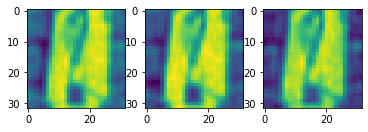

In [0]:
fig,ax=py.subplots(1,3)
for x,y in data_loader:
  ax[0].imshow(x[0][0])
  ax[1].imshow(x[0][1])
  ax[2].imshow(x[0][2])


In [0]:
# Generator and Discriminator architectures
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.layer1=nn.Sequential(nn.ConvTranspose2d(3,64,kernel_size=5,),nn.BatchNorm2d(64),nn.Tanh())
    self.layer2=nn.Sequential(nn.ConvTranspose2d(64,128,kernel_size=5),nn.BatchNorm2d(128),nn.Tanh())
    self.layer3=nn.Sequential(nn.ConvTranspose2d(128,48,kernel_size=5),nn.BatchNorm2d(48),nn.Tanh())
    self.layer4=nn.Sequential(nn.ConvTranspose2d(48,3,kernel_size=5),nn.BatchNorm2d(3),nn.Tanh())
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    x=self.layer4(x)
    return x
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.layer1=nn.Sequential(nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5,),nn.BatchNorm2d(64),nn.LeakyReLU())
    self.layer2=nn.Sequential(nn.Conv2d(64,128,kernel_size=5),nn.BatchNorm2d(128),nn.LeakyReLU())
    self.layer3=nn.Sequential(nn.Conv2d(128,48,kernel_size=5),nn.BatchNorm2d(48),nn.LeakyReLU())
    self.layer4=nn.Sequential(nn.Conv2d(48,32,kernel_size=5),nn.BatchNorm2d(32),nn.LeakyReLU(),nn.AdaptiveAvgPool2d((1,1)))
    self.fc=nn.Sequential(nn.Flatten(),nn.Linear(32,1,))
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    x=self.layer4(x)
    x=self.fc(x)
    return x

    



In [0]:
gen=Generator()
dis=Discriminator()
opt_gen=torch.optim.RMSprop(gen.parameters())
opt_dis=torch.optim.RMSprop(dis.parameters())
gen=gen.cuda()
dis=dis.cuda()

In [0]:
def noise(size):
  l1=torch.randn(size,size,3,8)
  l1=l1.view(8,3,size,size)
  return l1
def train_generator(gen,opt_gen,fake):
  opt_gen.zero_grad()
  pred=gen(fake)
  loss=-(torch.mean(pred))
  loss.backward()
  opt_gen.step()
  for i in gen.parameters():
    i.data.clamp_(-0.01, 0.01)
  return loss

In [0]:
def train_discriminator(dis,opt_dis,real,fake):
  opt_dis.zero_grad()
  pred1=dis(real)
  pred2=dis(fake)
  loss=-(torch.mean(pred1)-torch.mean(pred2))  
  loss.backward()
  opt_dis.step()
  for i in dis.parameters():
    i.data.clamp_(-0.01, 0.01)
  return loss


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([8, 3, 8, 8])


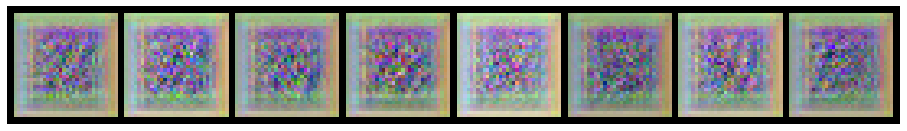

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


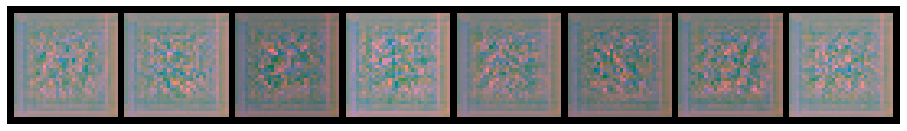

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


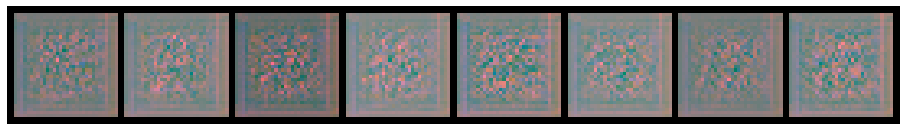

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


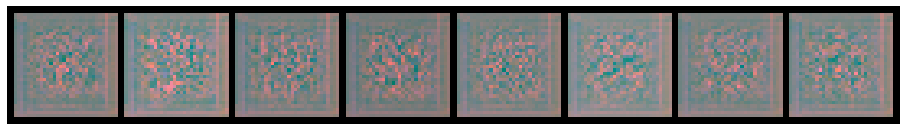

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


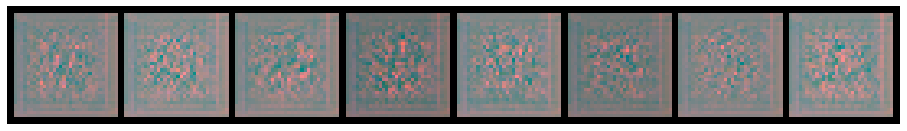

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


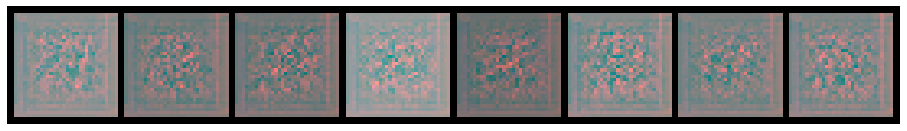

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


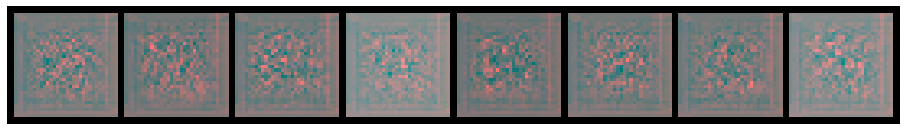

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


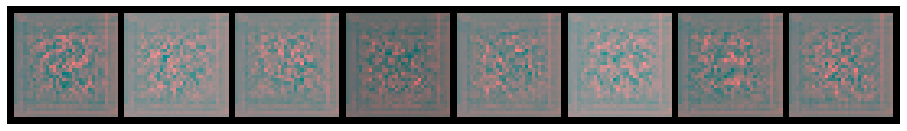

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


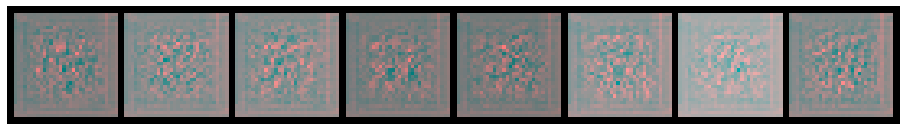

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


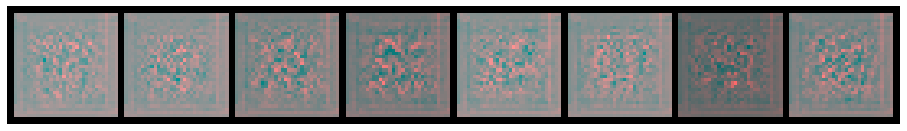

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


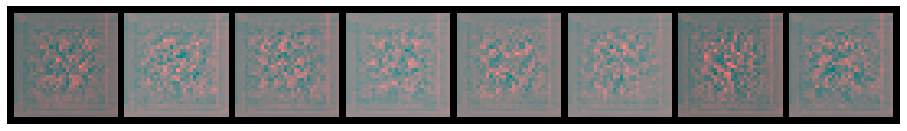

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


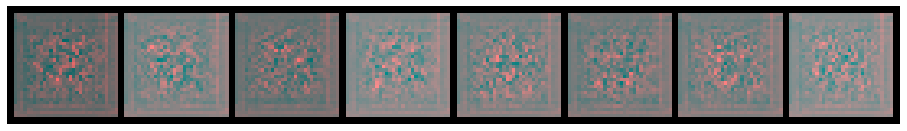

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


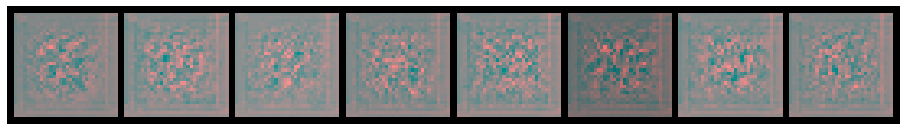

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


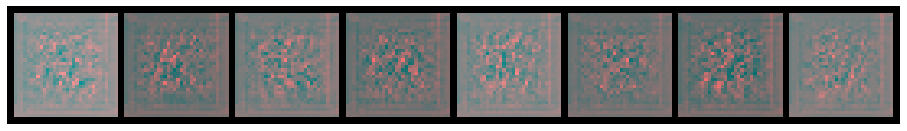

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


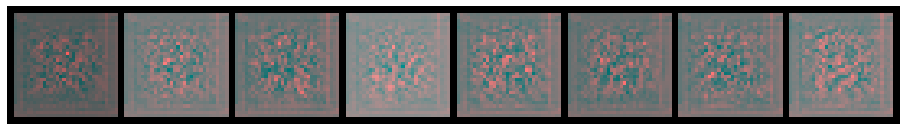

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


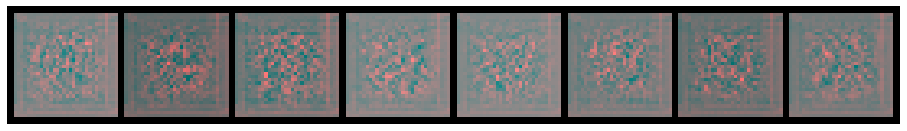

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


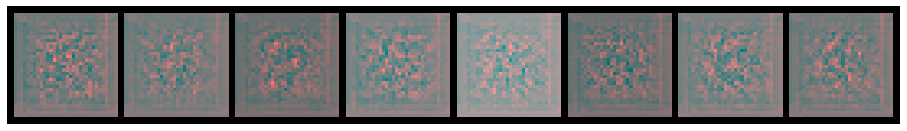

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


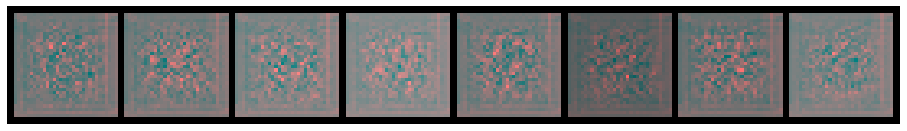

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


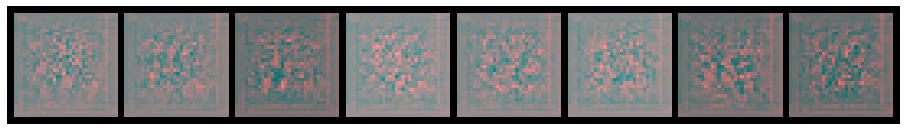

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


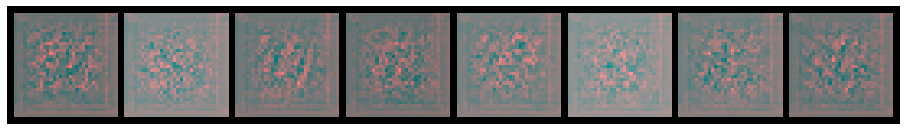

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


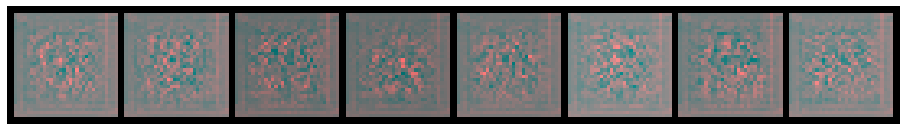

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


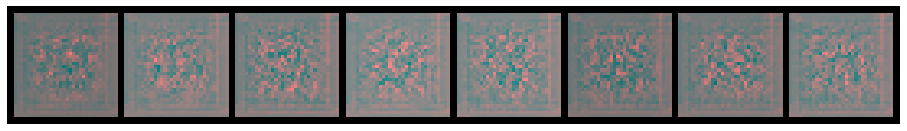

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


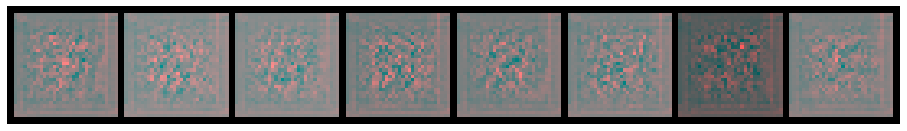

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


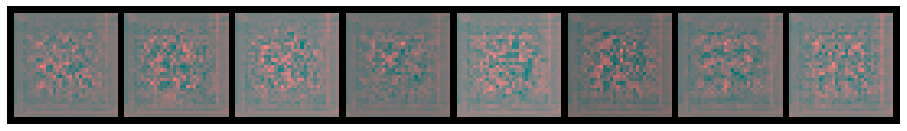

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


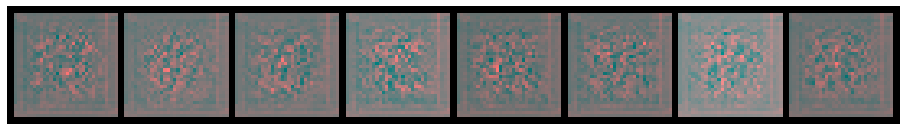

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


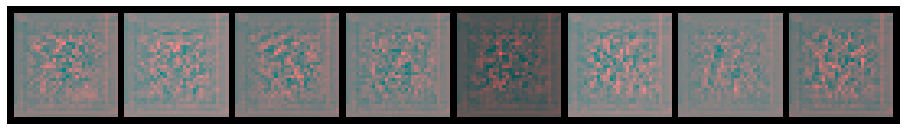

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


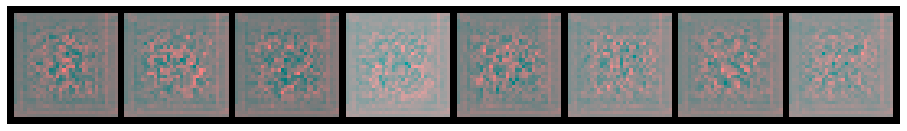

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


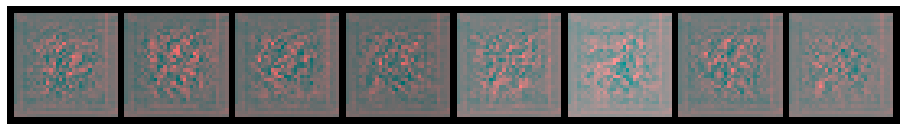

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


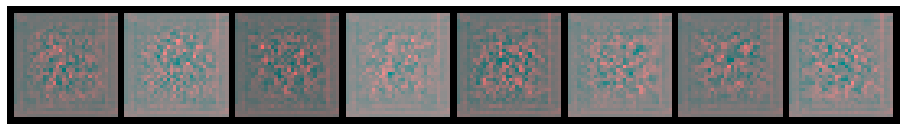

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


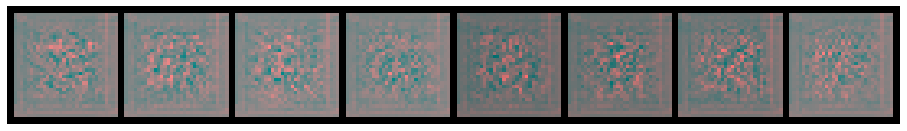

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


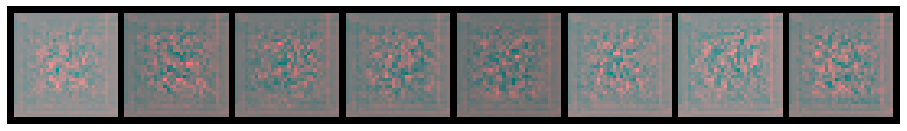

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


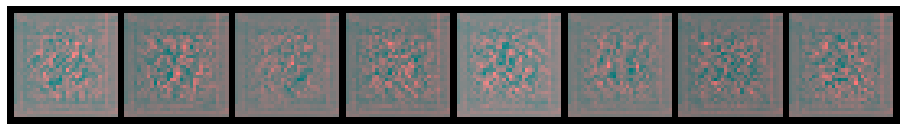

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


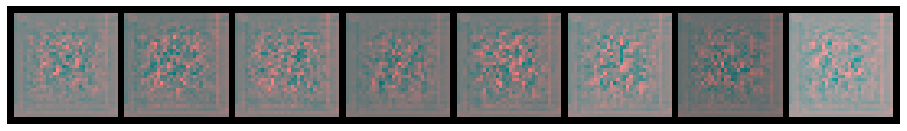

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


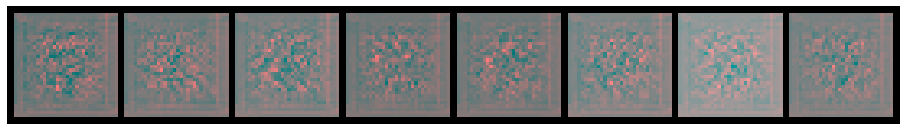

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


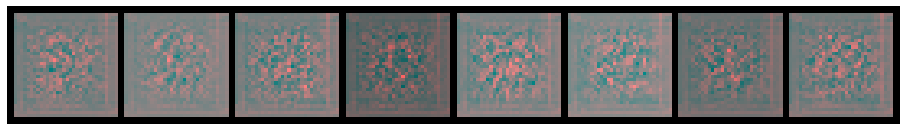

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


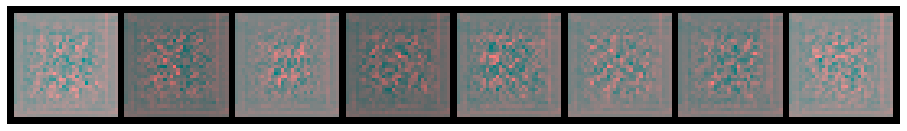

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


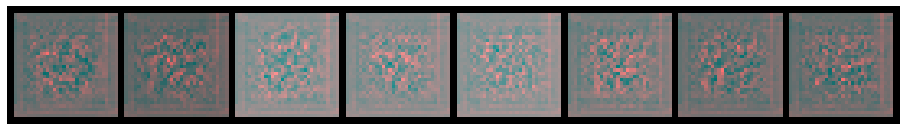

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


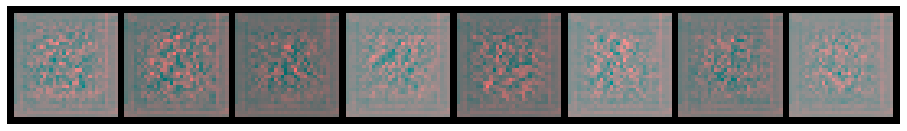

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


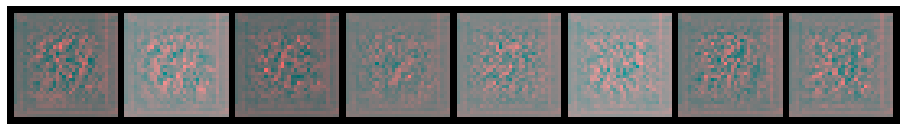

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


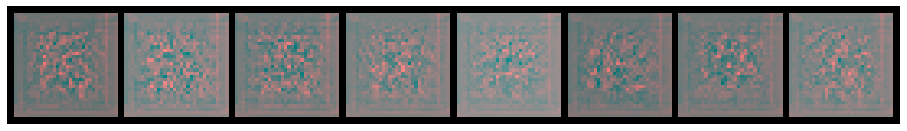

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


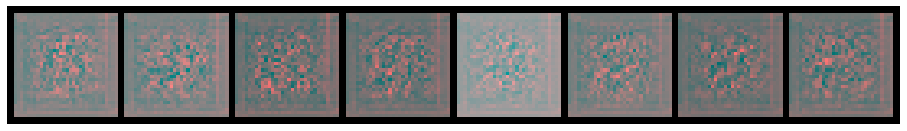

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


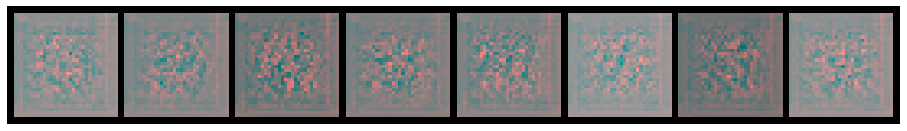

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


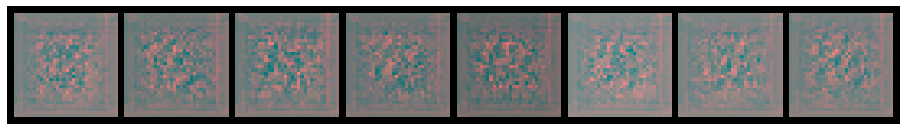

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


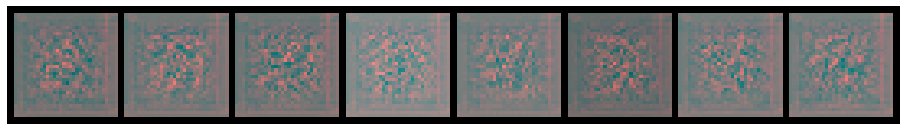

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


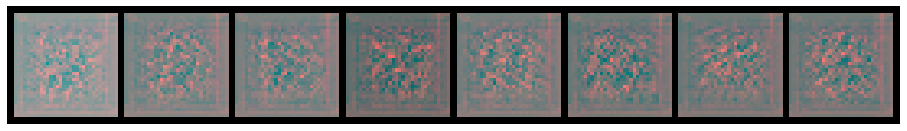

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


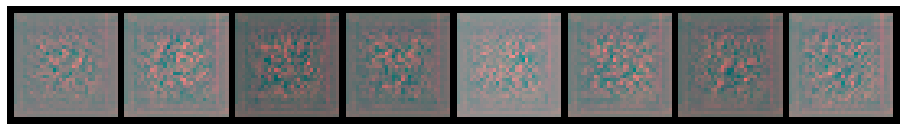

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


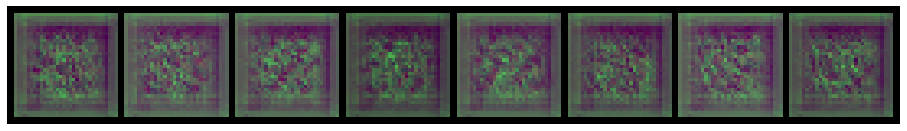

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


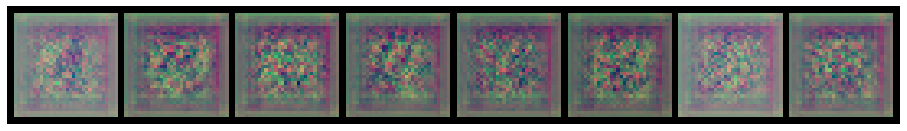

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


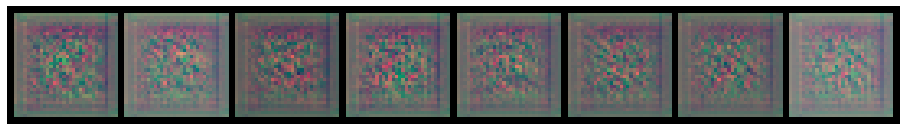

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


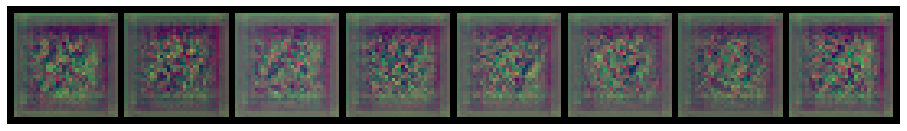

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


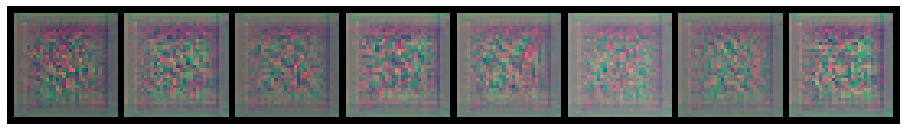

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


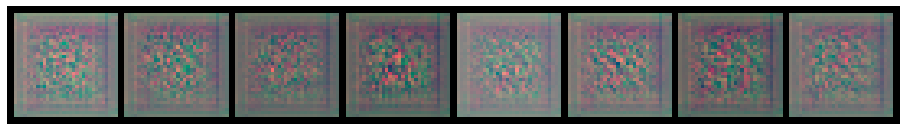

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


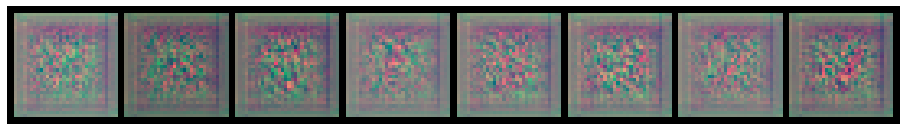

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


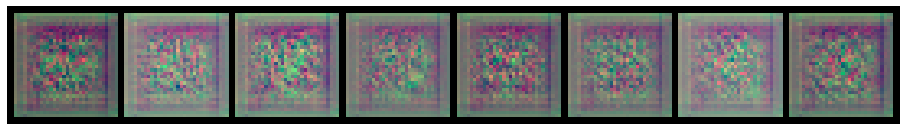

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


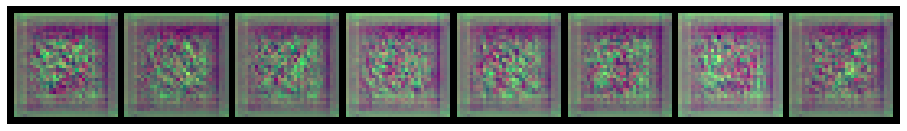

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


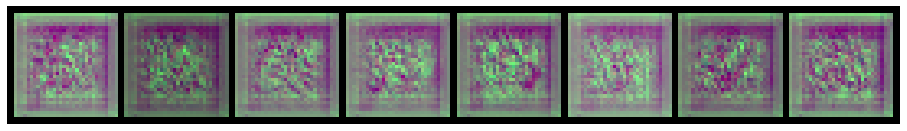

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


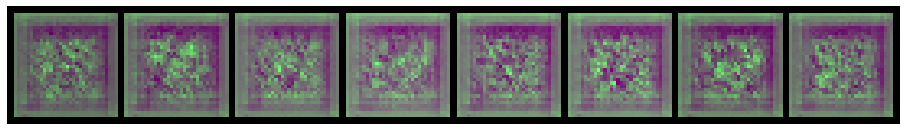

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


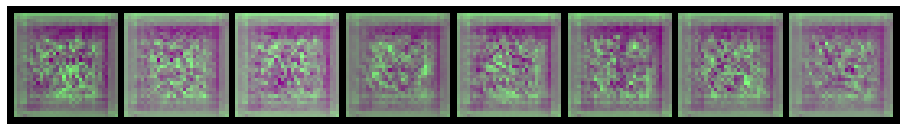

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


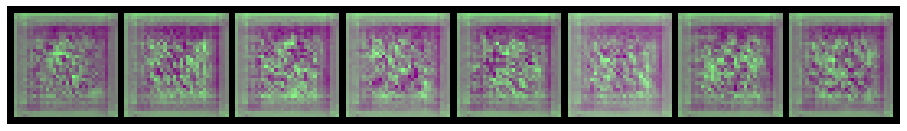

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


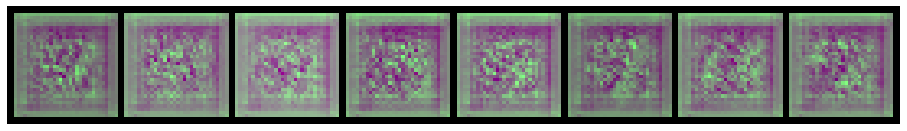

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


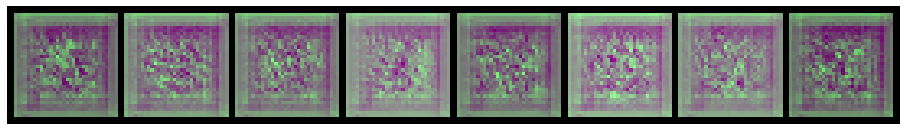

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


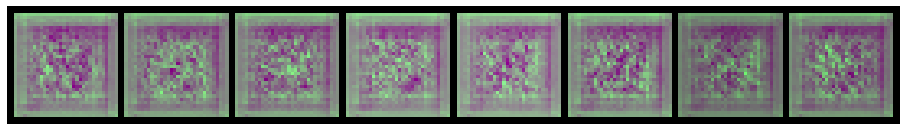

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


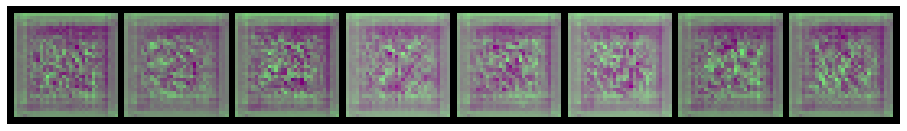

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


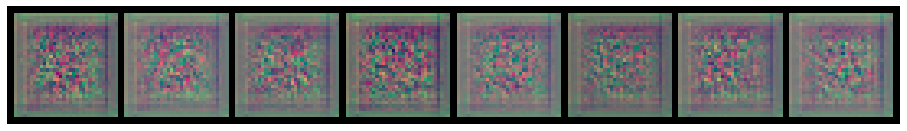

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


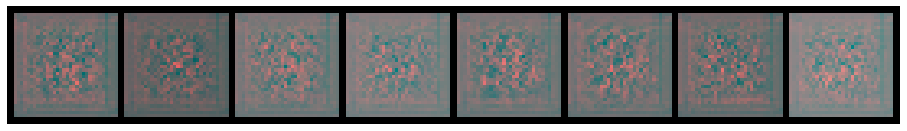

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


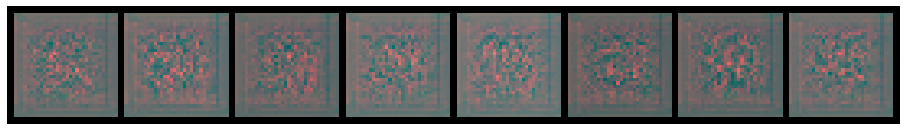

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


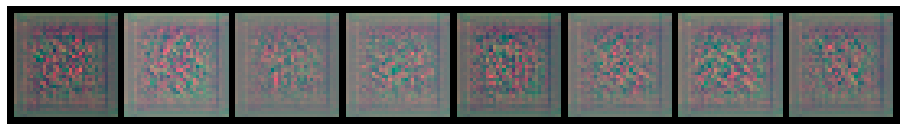

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


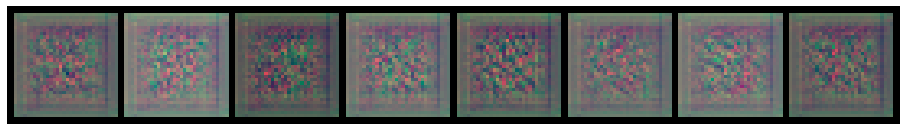

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


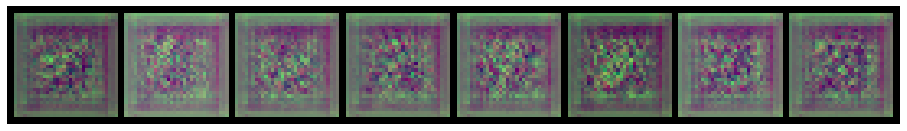

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


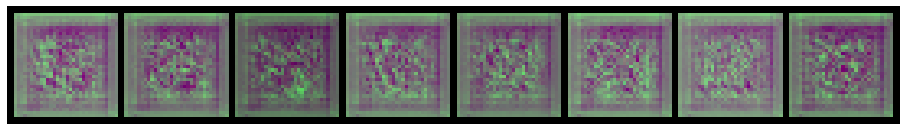

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


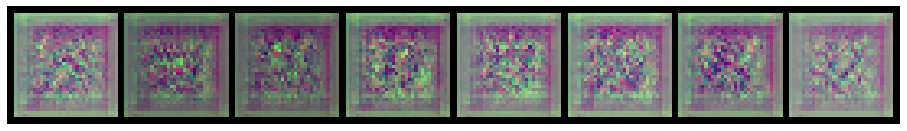

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


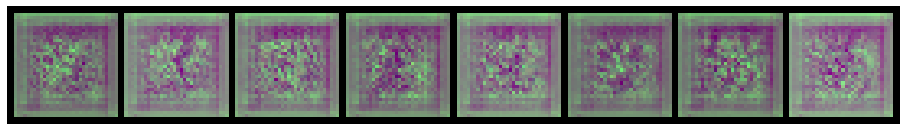

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


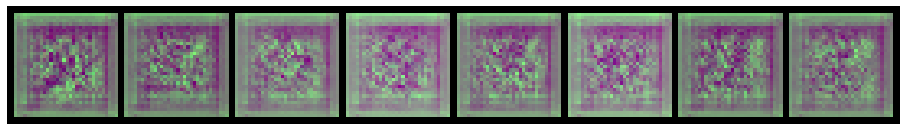

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


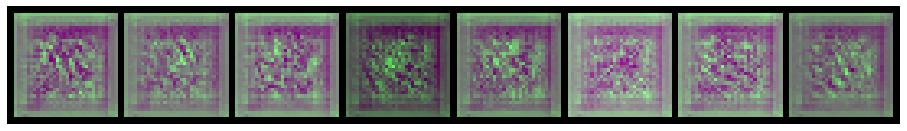

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


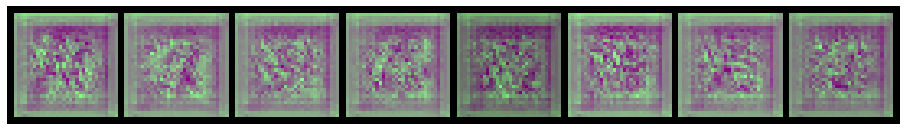

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


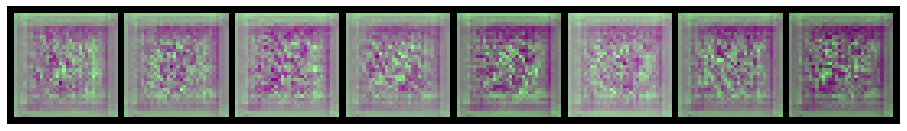

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


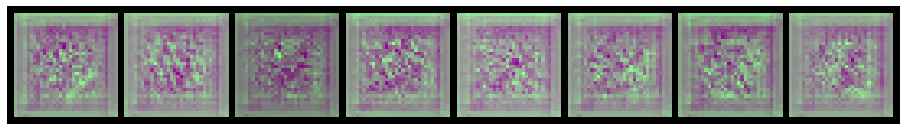

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


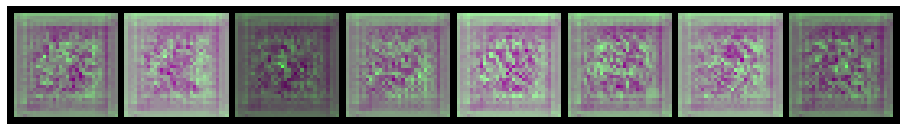

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


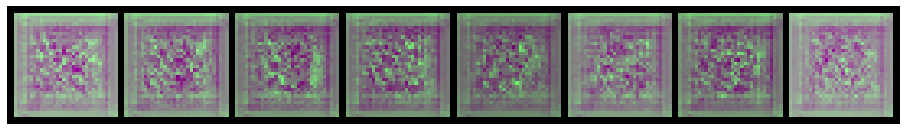

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


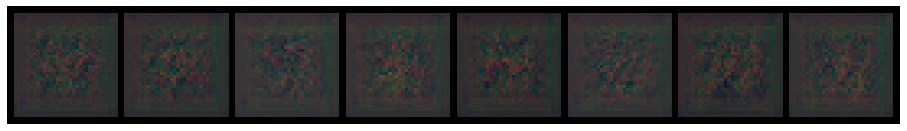

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


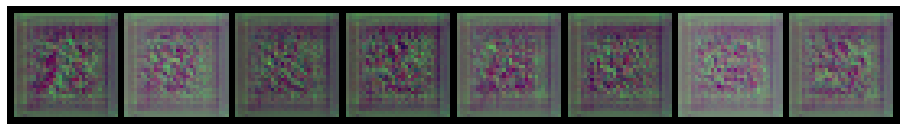

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


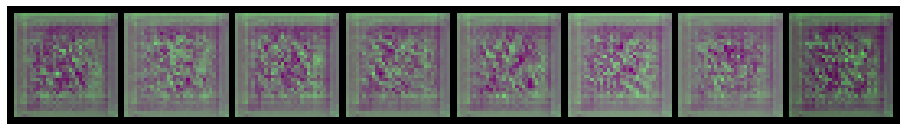

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


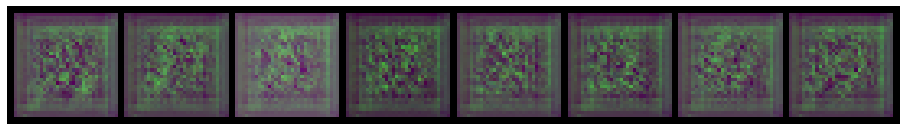

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


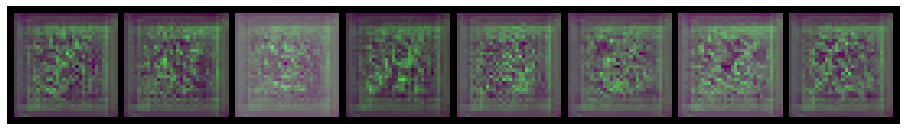

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


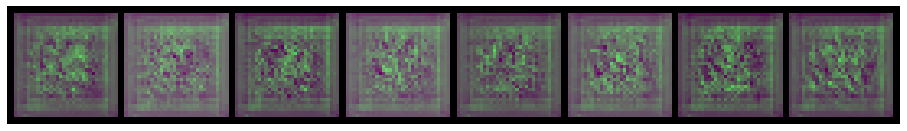

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


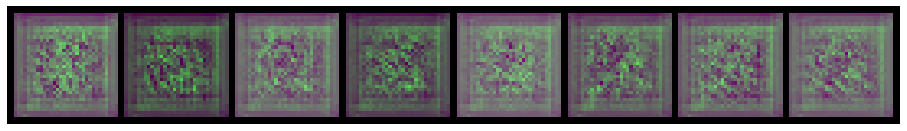

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


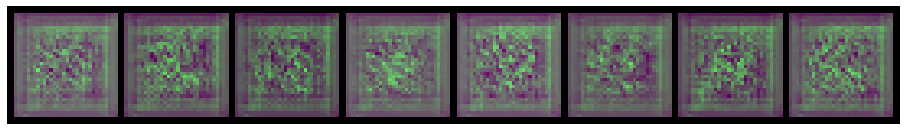

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


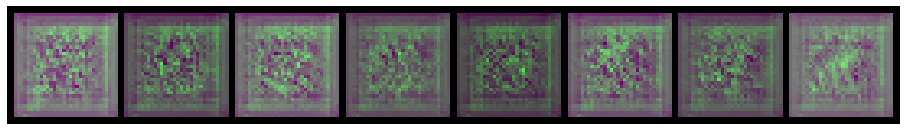

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


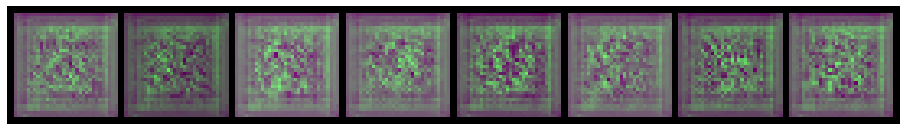

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


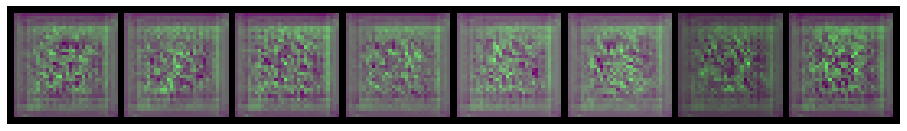

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


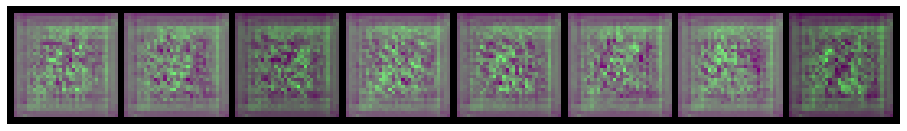

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


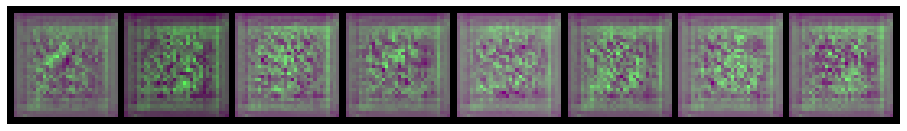

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


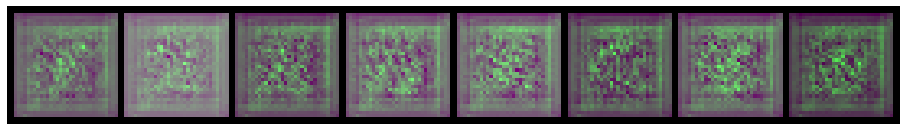

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


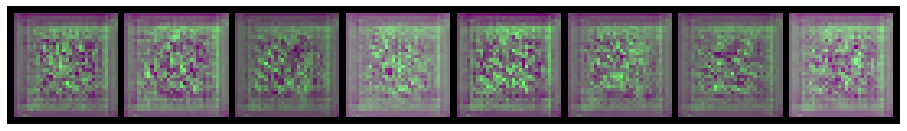

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


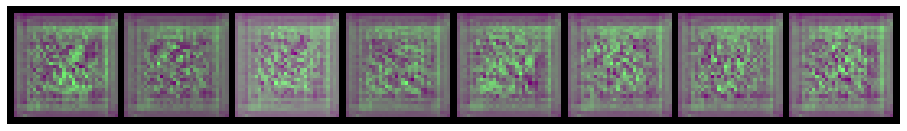

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


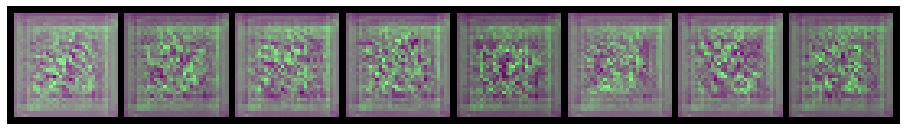

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


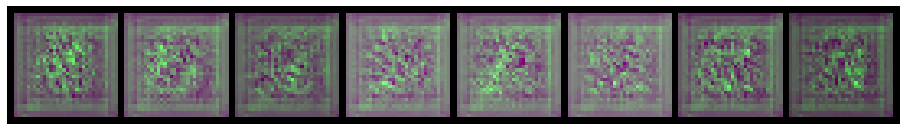

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


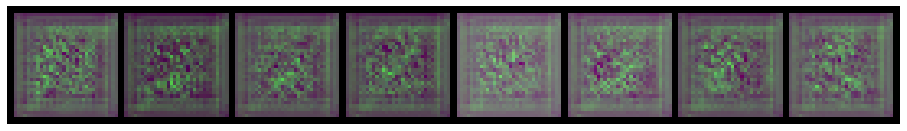

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


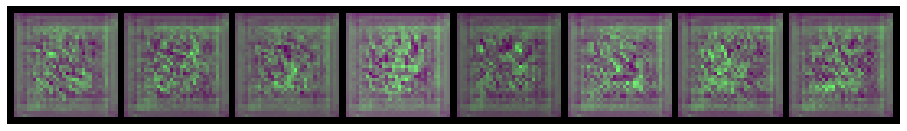

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


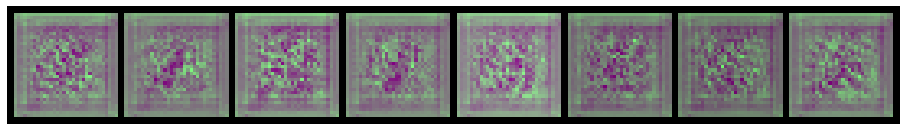

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


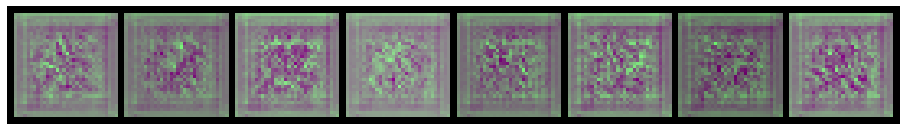

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


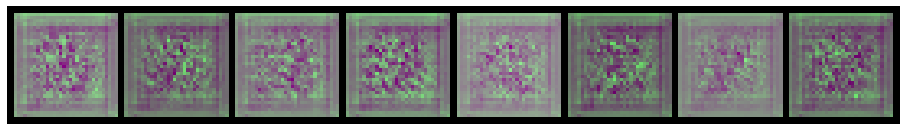

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


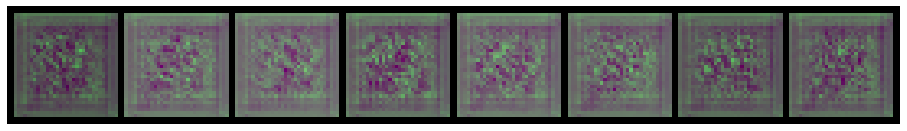

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


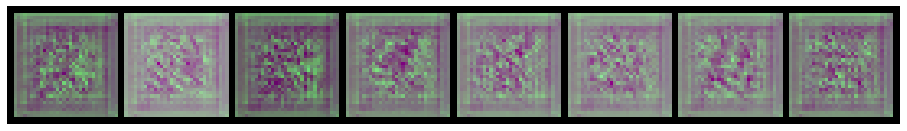

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


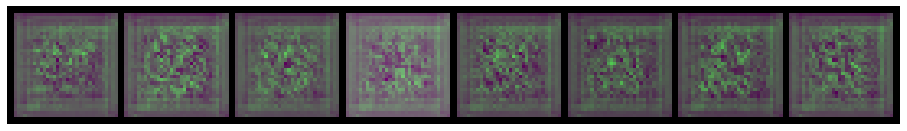

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


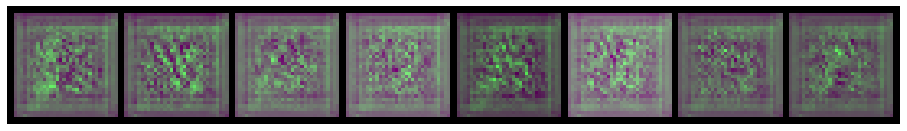

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


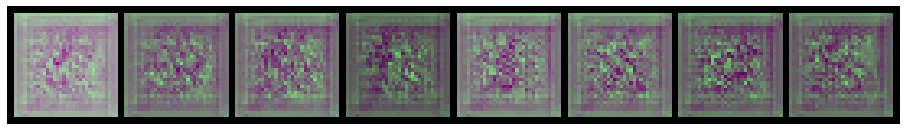

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


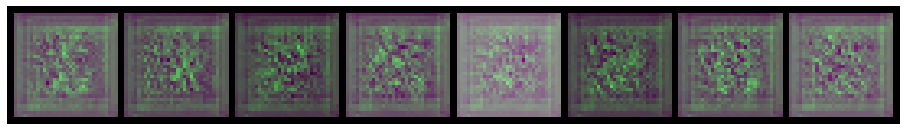

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


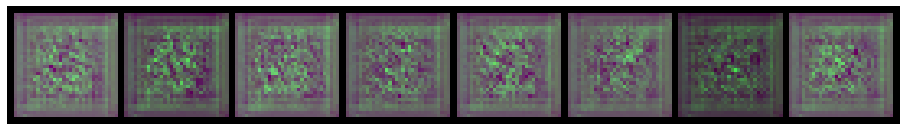

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


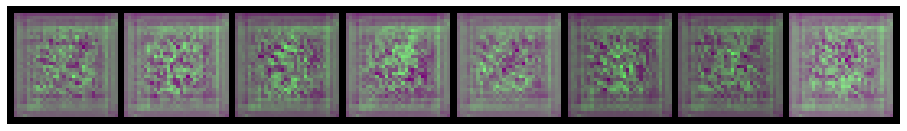

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


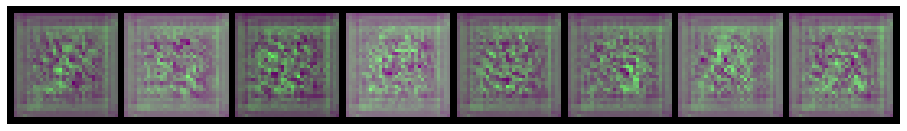

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


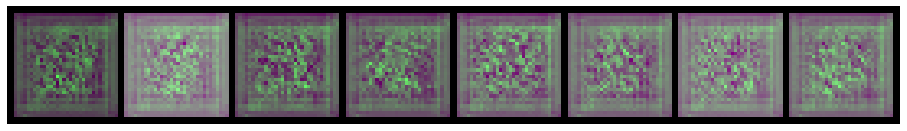

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


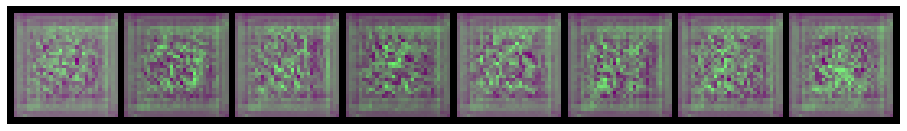

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


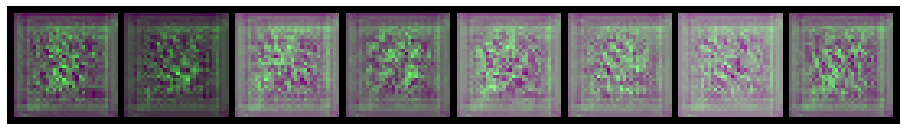

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


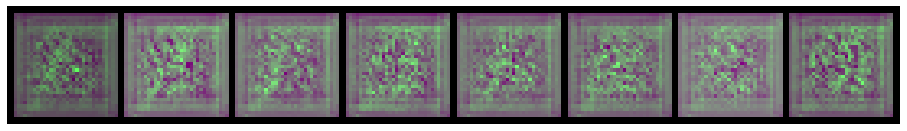

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


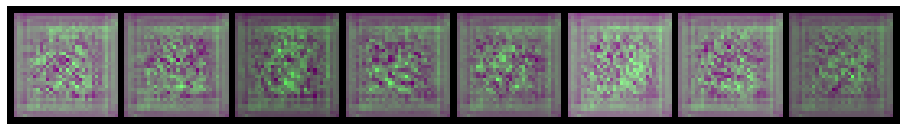

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


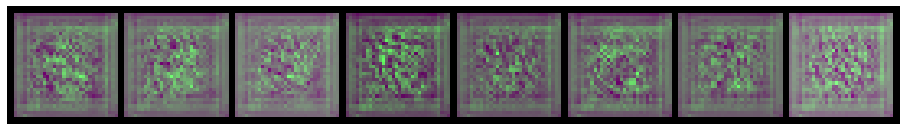

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


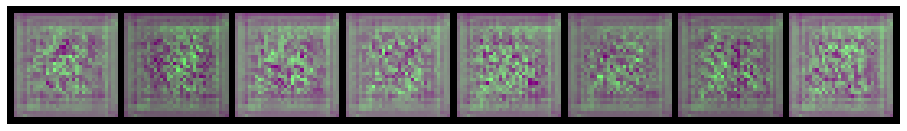

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


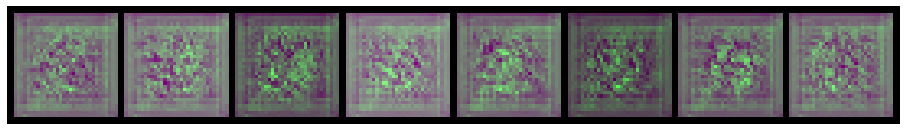

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


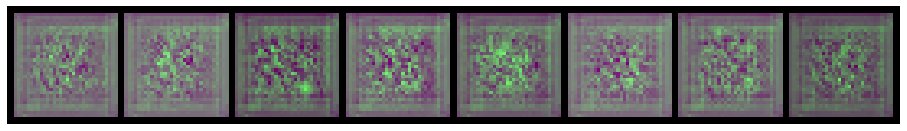

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


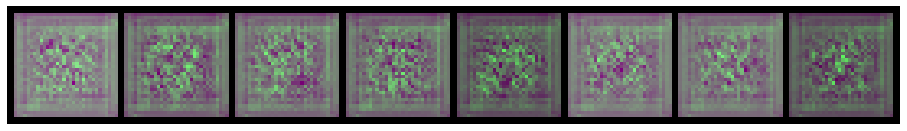

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


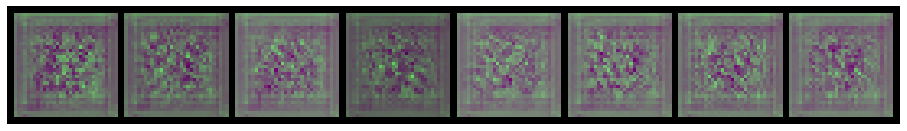

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


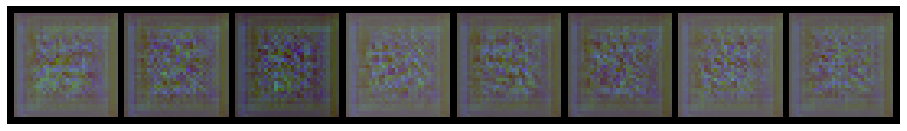

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


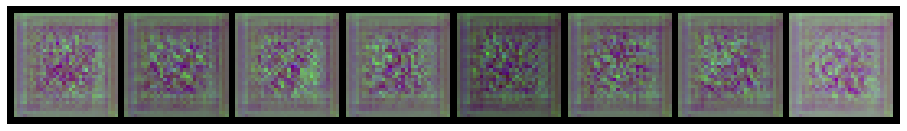

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


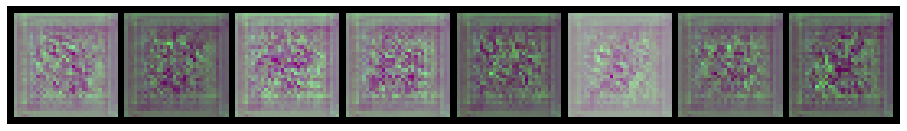

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


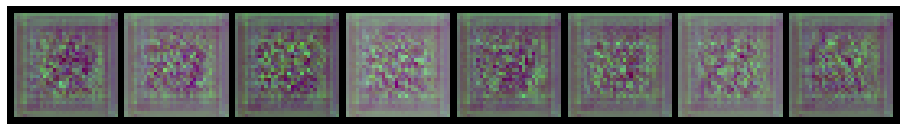

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


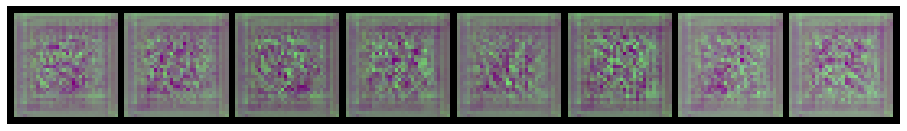

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


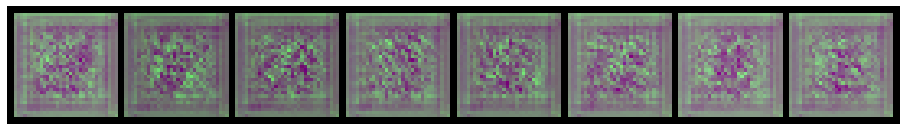

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


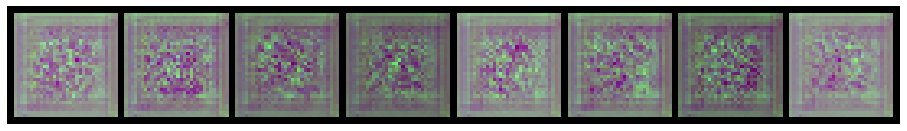

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


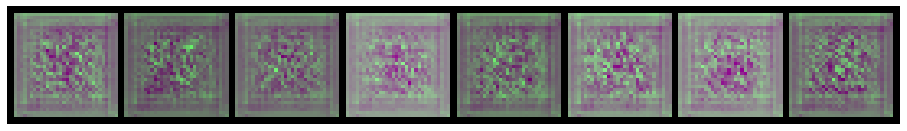

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


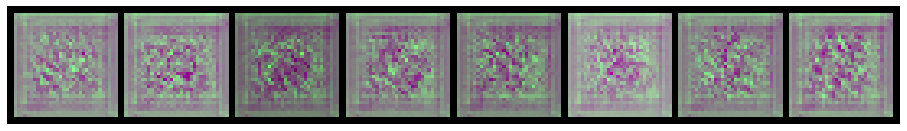

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


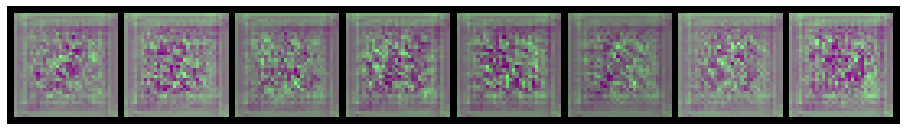

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


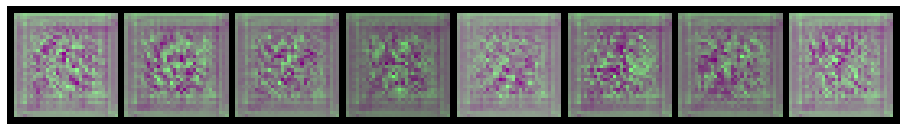

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


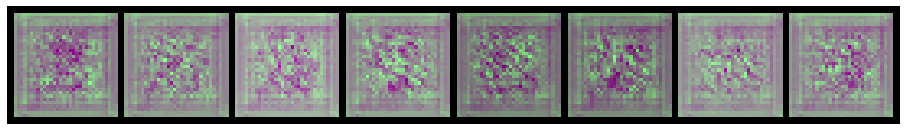

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


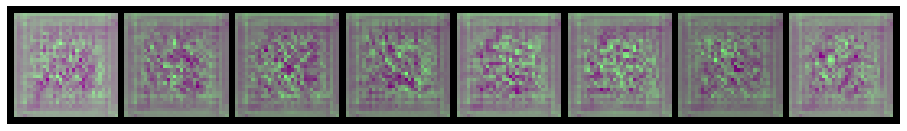

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


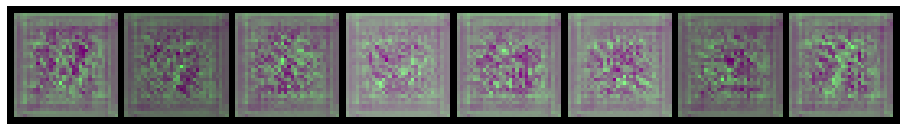

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


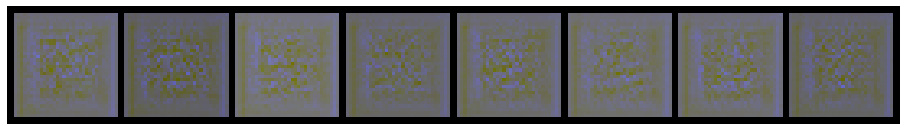

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


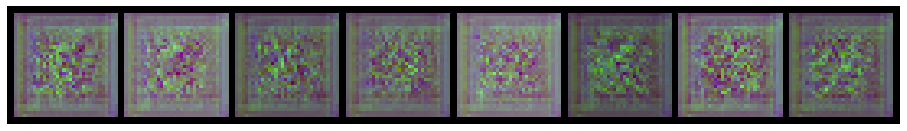

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


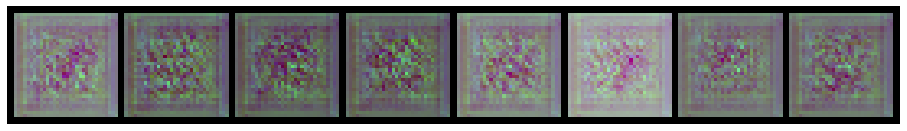

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


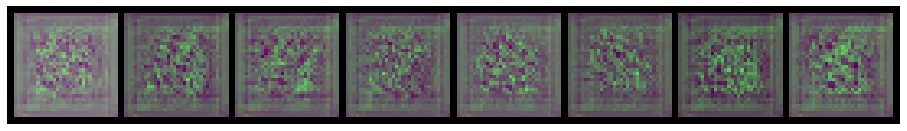

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


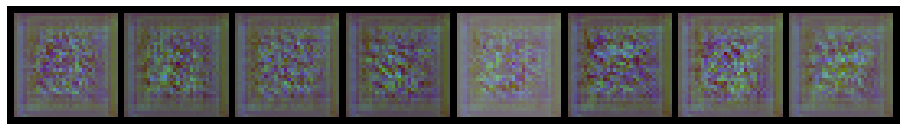

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


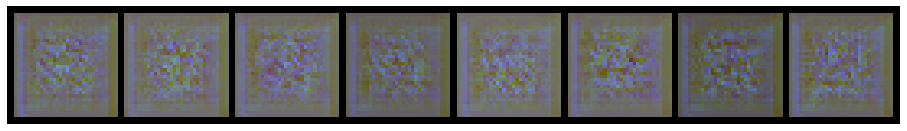

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


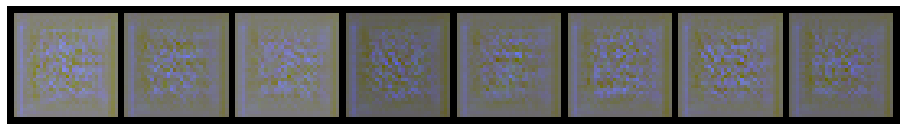

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


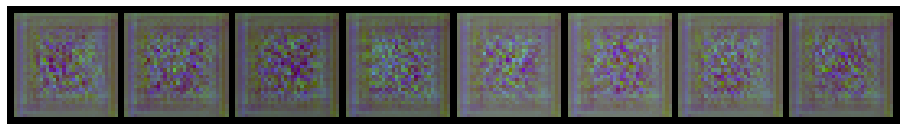

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


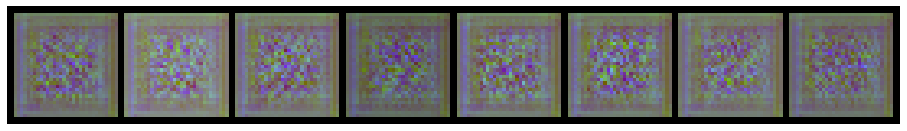

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


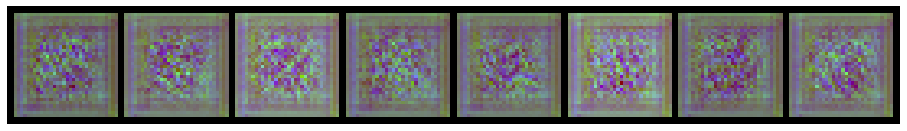

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


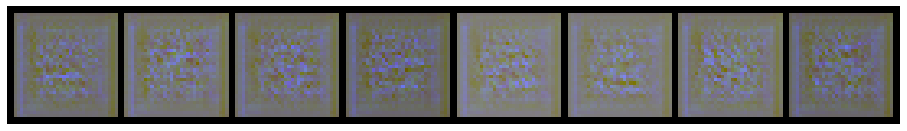

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


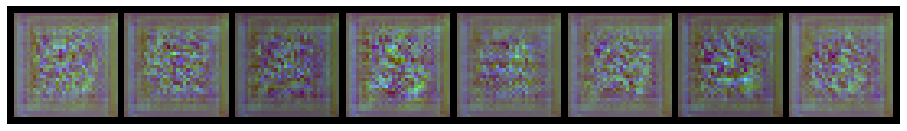

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


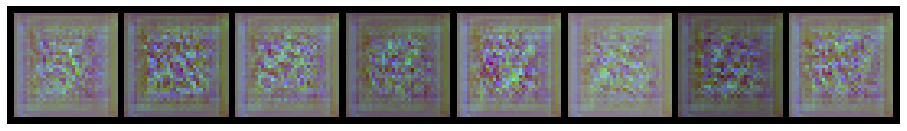

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


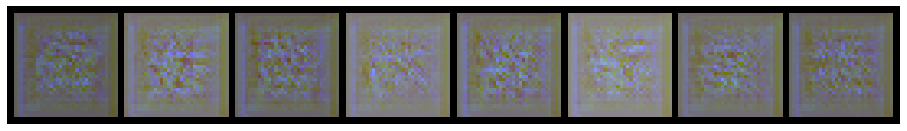

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


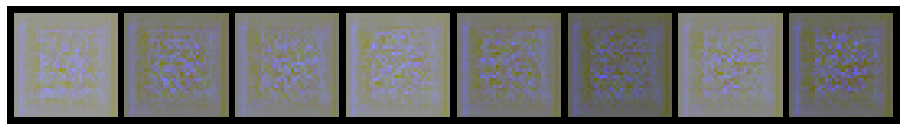

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


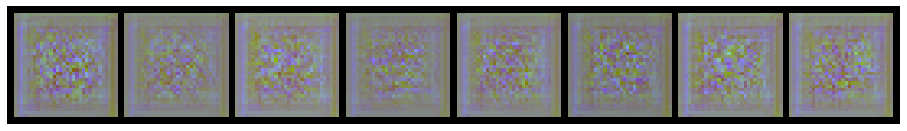

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


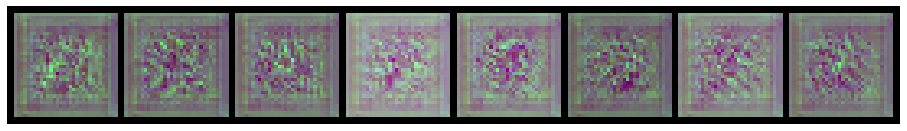

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


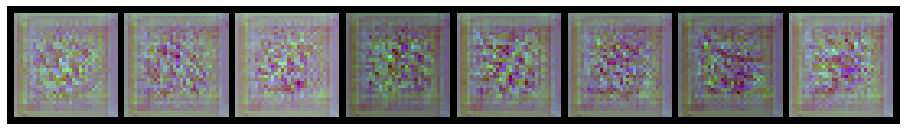

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


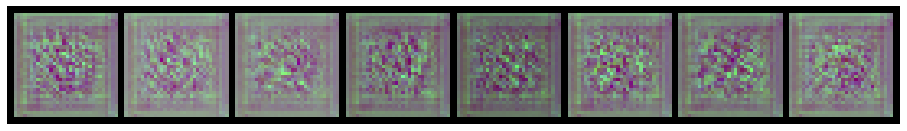

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


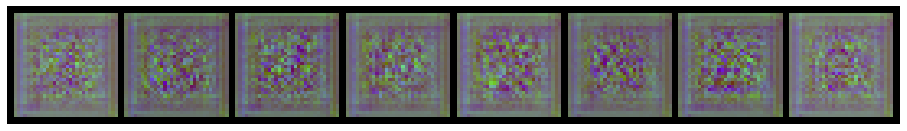

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


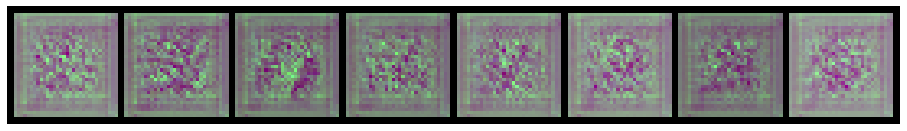

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


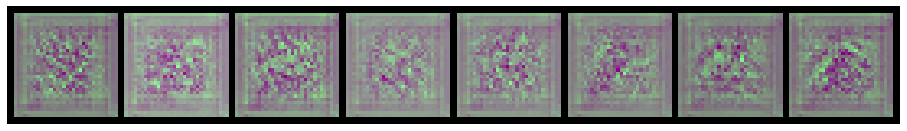

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


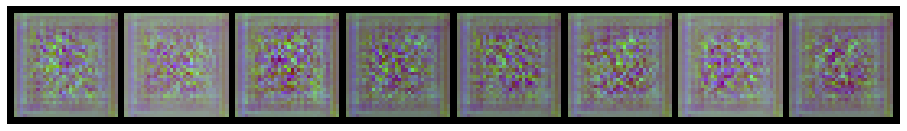

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


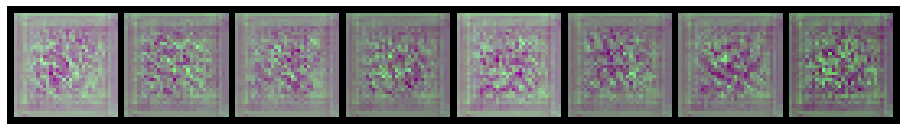

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


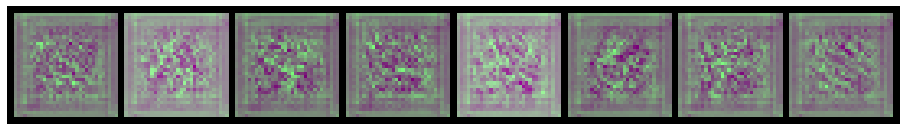

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


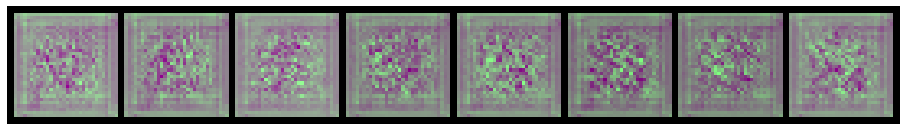

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


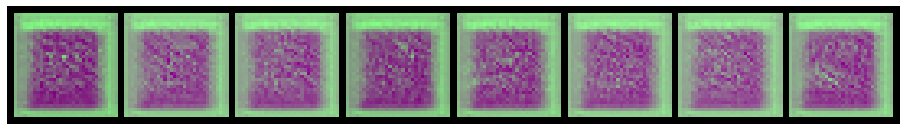

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


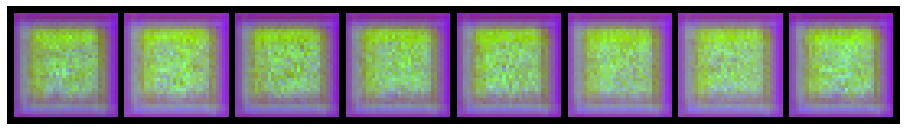

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


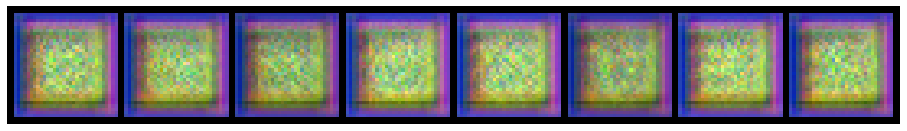

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


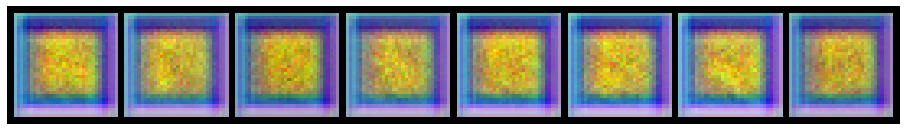

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


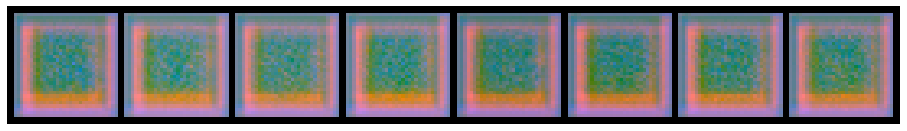

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


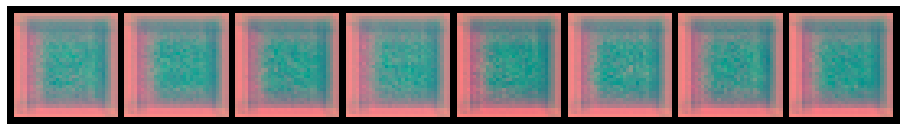

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


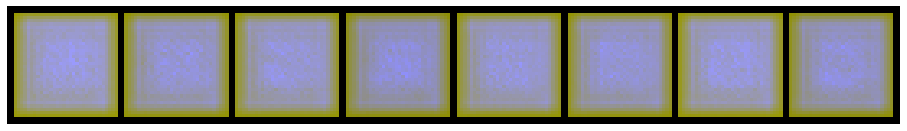

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


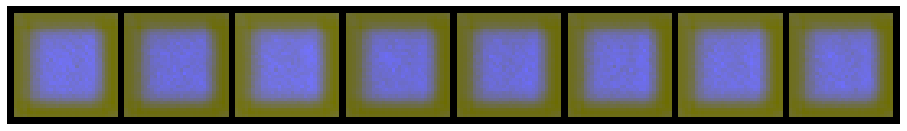

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


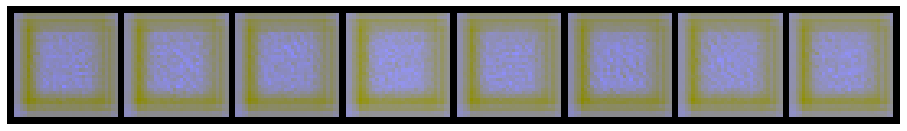

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


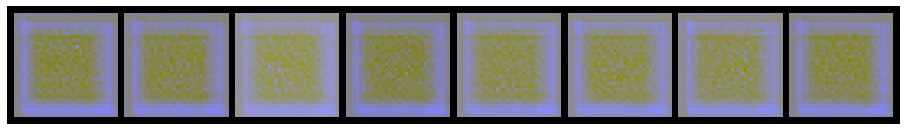

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


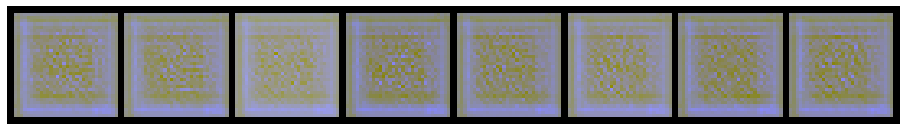

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


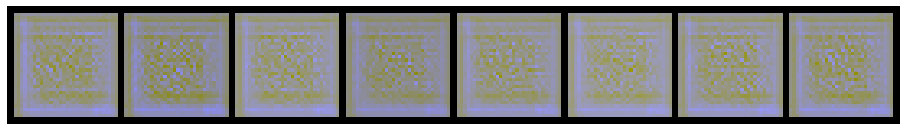

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


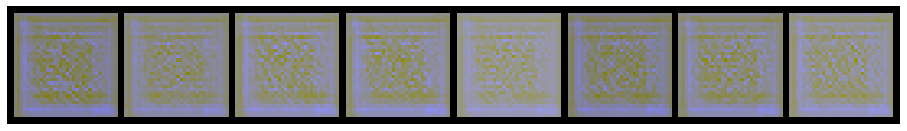

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


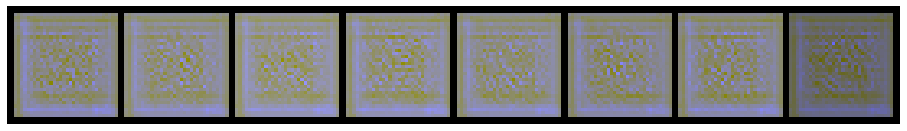

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


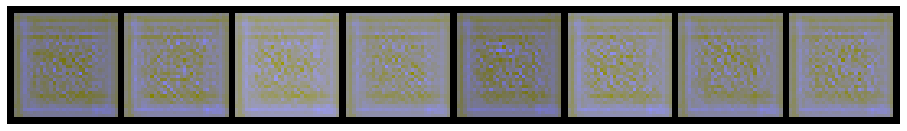

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


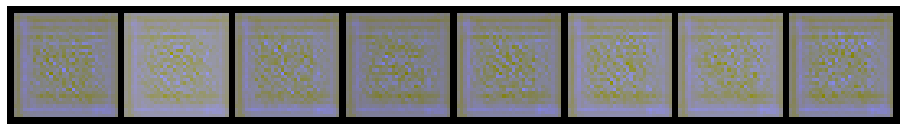

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


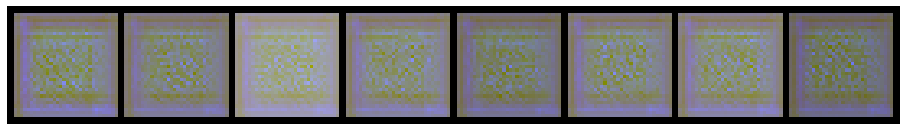

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


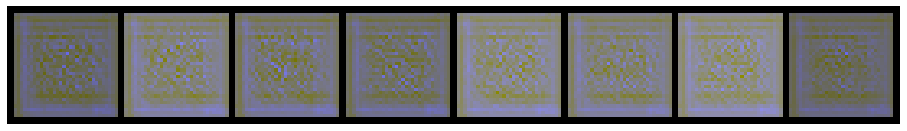

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


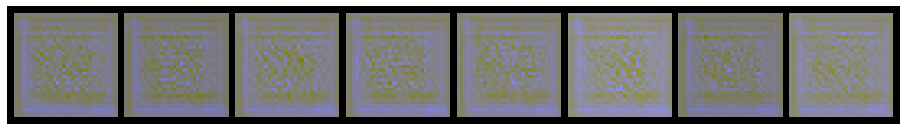

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


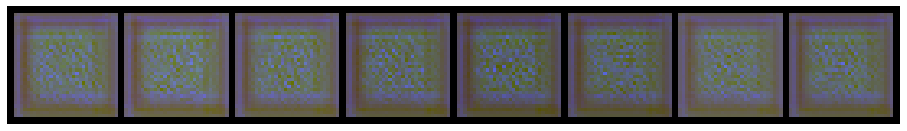

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


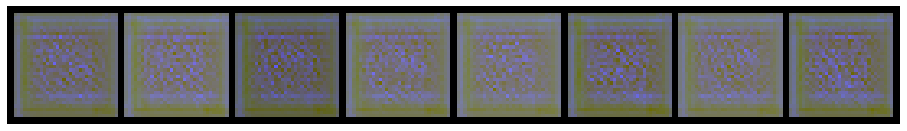

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


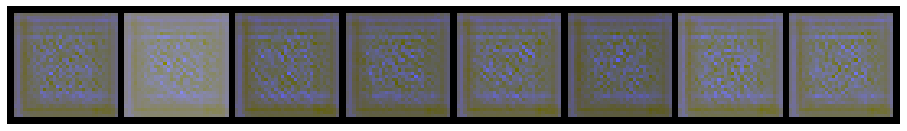

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


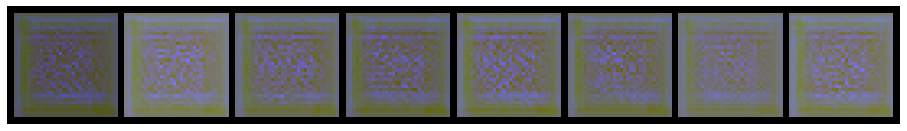

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


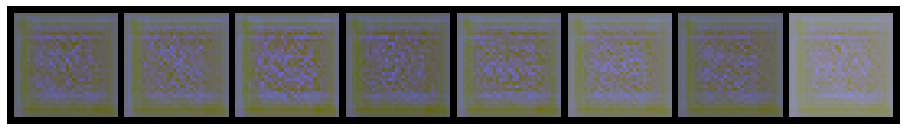

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


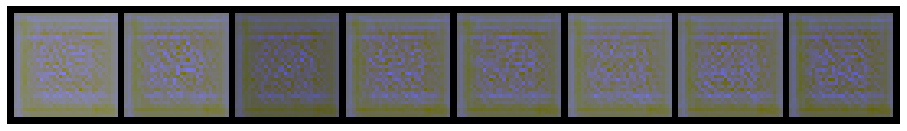

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


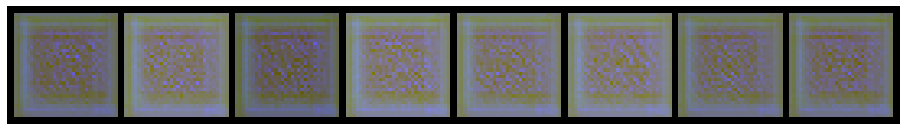

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


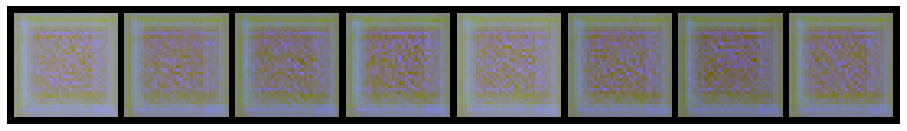

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


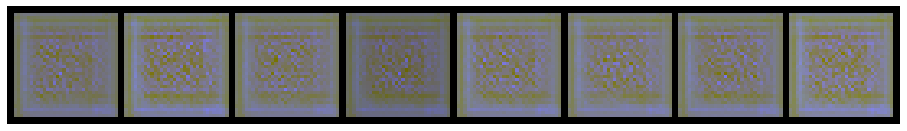

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


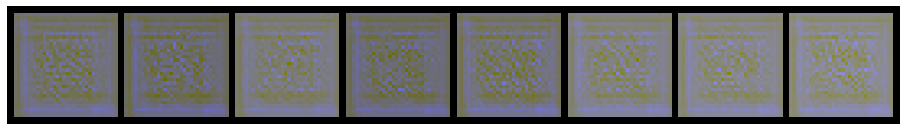

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


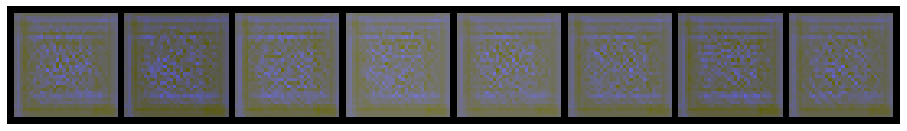

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


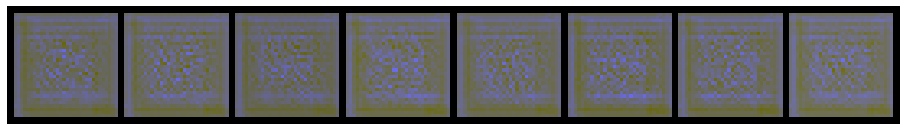

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


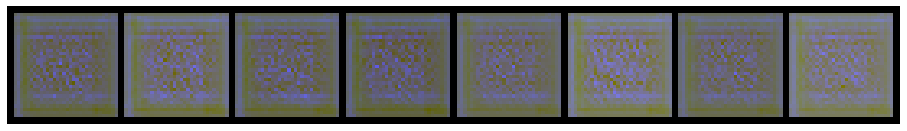

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


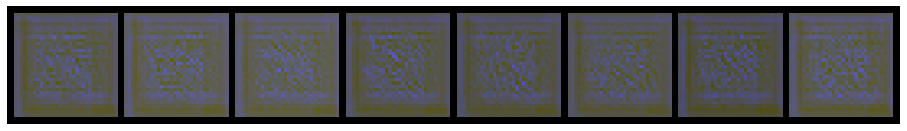

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


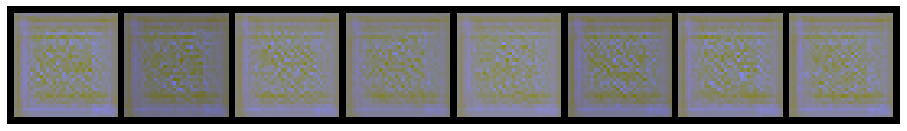

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


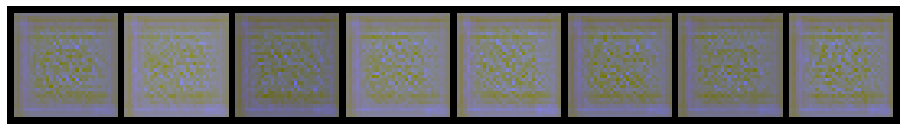

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


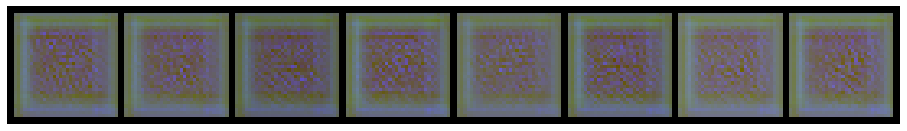

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


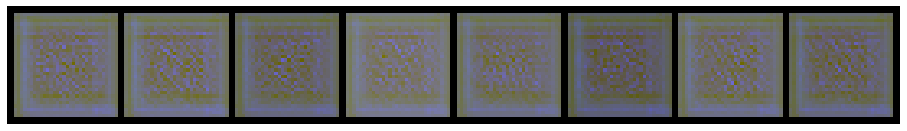

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


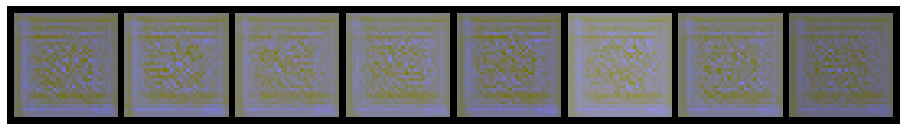

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


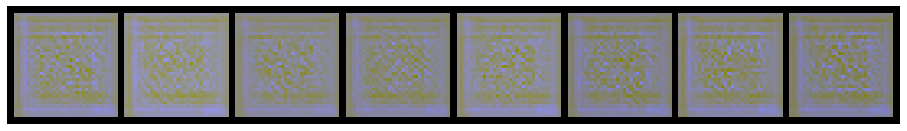

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


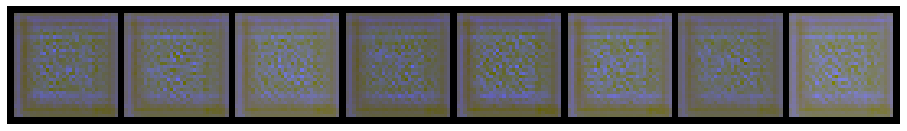

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


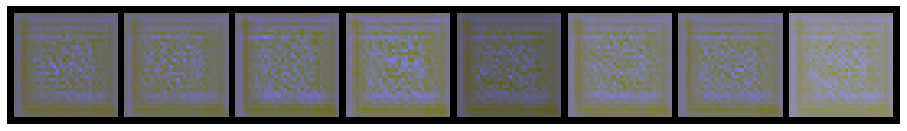

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


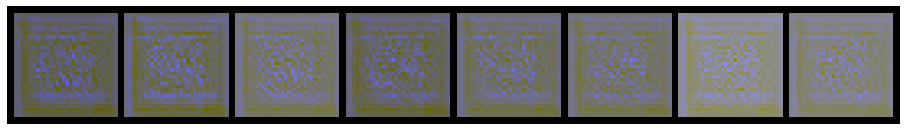

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


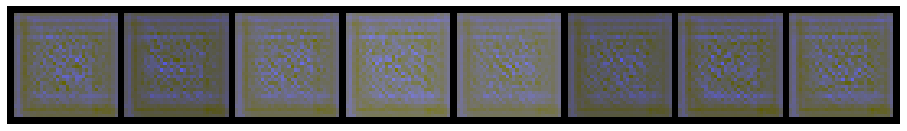

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


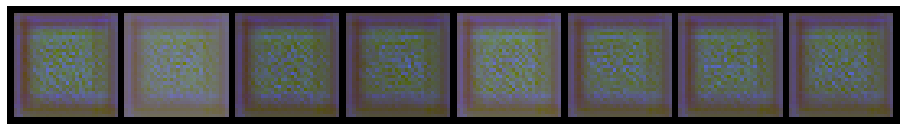

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


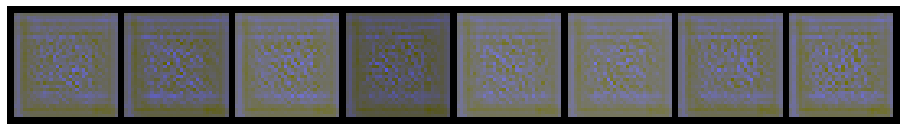

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


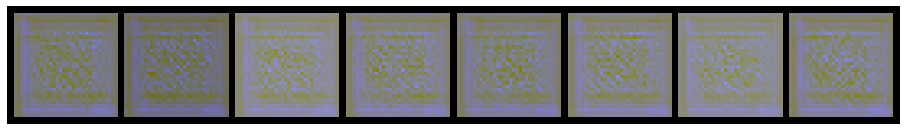

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


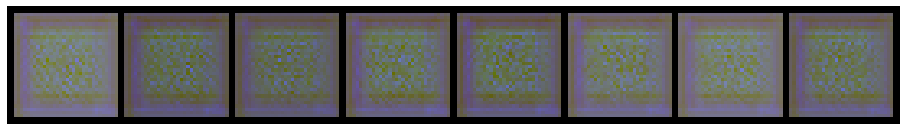

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


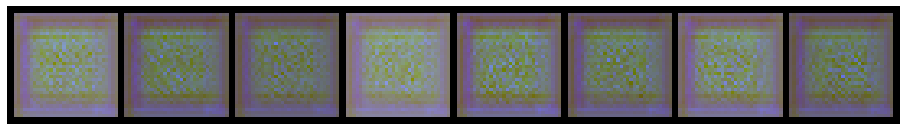

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


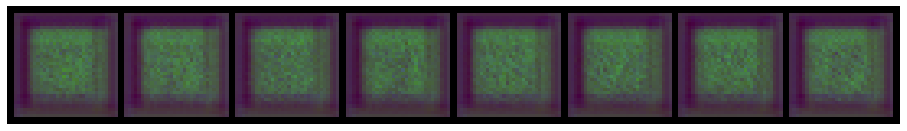

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


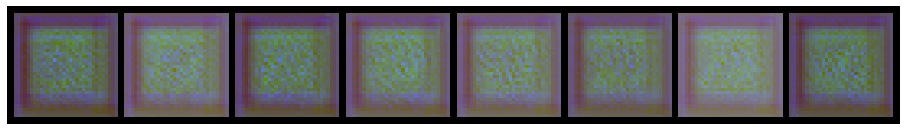

torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])
torch.Size([8, 3, 8, 8])


In [0]:
logger = Logger(model_name='WGAN', data_name='SVHN')
for epoch in tqdm(range(10)):
  for n_b,(x,_) in enumerate(data_loader):
    x=Variable(x).cuda()
    fake_data=Variable(noise(x.size(0))).cuda()
    #print(fake_data.size())
    fake=gen(fake_data).detach()
    loss_d=train_discriminator(dis,opt_dis,x,fake)
    loss_g=train_generator(gen,opt_gen,fake)
    logger.log(loss_d,loss_g,epoch,n_batch=n_b,num_batches=8)
    if(n_b%4==0):
      test_samples=Variable(noise(16)).cuda()
      test_images=gen(test_samples).cpu()
      test_im=test_images.data
      logger.log_images(test_im,16,epoch,n_b,8)
      